# Furniture Sales Forecast

# Business Objective

### Building best forecast model to predict the furniture sales and estimating the future trends. A forecast is estimated based on the past sales.

In [201]:
#Importing libraries
import pandas as pd                                                #for reading the file
import numpy as np                                                 #creating range of numbers

import matplotlib.pyplot as plt                                    #visualization and EDA
import seaborn as sns                                              #Visualizations of any graphs

from statsmodels.tsa.seasonal import seasonal_decompose            #find wheater trend or seasonality
from statsmodels.tsa.stattools import adfuller, acf,pacf           #checking data stationarity
from statsmodels.tsa.arima_model import ARIMA                      #ARMA model building
from sklearn.metrics import mean_squared_error                     #Finding the errors
import statsmodels.api as sm
# ACF and PACF charts
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf      #ACF and PACF graphs
# SARIMA/SARIMAX model
from statsmodels.tsa.statespace.sarimax import SARIMAX             #SARIMA & SARIMAX model building

import warnings
warnings.filterwarnings('ignore')                                  #Filtering the warnings

In [210]:
#Reading the file
path= 'D:\data science\level_3\coarse_2\project_4\DS3_C6_S4_TimeSeries_Sales_Data_Project.xls'
sales_df= pd.read_excel(path, parse_dates=True)
sales_df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [211]:
sales_df.dtypes

Row ID                    int64
Order ID                 object
Order Date       datetime64[ns]
Ship Date        datetime64[ns]
Ship Mode                object
Customer ID              object
Customer Name            object
Segment                  object
Country                  object
City                     object
State                    object
Postal Code               int64
Region                   object
Product ID               object
Category                 object
Sub-Category             object
Product Name             object
Sales                   float64
Quantity                  int64
Discount                float64
Profit                  float64
dtype: object

In [204]:
#Checking the size of dataset
sales_df.shape

(9994, 21)

#### Dataset consists of 21-features and 9994 rows.

In [205]:
#checking the null values
sales_df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

#### There are no null values in data. Hence, missing value treatment is not required.

In [206]:
#checking the datatypes of each features
sales_df.dtypes

Row ID                    int64
Order ID                 object
Order Date       datetime64[ns]
Ship Date        datetime64[ns]
Ship Mode                object
Customer ID              object
Customer Name            object
Segment                  object
Country                  object
City                     object
State                    object
Postal Code               int64
Region                   object
Product ID               object
Category                 object
Sub-Category             object
Product Name             object
Sales                   float64
Quantity                  int64
Discount                float64
Profit                  float64
dtype: object

#### The datatype of OrderDate and ShipDate is datetime64.

In [89]:
#Dropping  'Row ID' and 'Postal Code'
sales_df.drop(['Row ID', 'Postal Code'], axis=1, inplace=True)

#### Dropping the 'Row_ID' & 'Postal Code' feature as this is not usefull for predictions

In [90]:
#considering only Furniture category
new_sales_df= sales_df[sales_df.Category=='Furniture']
new_sales_df.head(3)

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
3,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310


In [91]:
#Setting index column as order date
sales_df1= new_sales_df.set_index('Order Date')
sales_df1.head(10)

,Order ID,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
Order Date,,,,,,,,,,,,,,,,,,
2016-11-08,CA-2016-152156,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
2016-11-08,CA-2016-152156,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2015-10-11,US-2015-108966,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
2014-06-09,CA-2014-115812,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
2014-06-09,CA-2014-115812,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092
2017-07-16,US-2017-156909,2017-07-18,Second Class,SF-20065,Sandra Flanagan,Consumer,United States,Philadelphia,Pennsylvania,East,FUR-CH-10002774,Furniture,Chairs,"Global Deluxe Stacking Chair, Gray",71.3720,2,0.30,-1.0196
2015-09-25,CA-2015-106320,2015-09-30,Standard Class,EB-13870,Emily Burns,Consumer,United States,Orem,Utah,West,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,1044.6300,3,0.00,240.2649
2015-09-17,US-2015-150630,2015-09-21,Standard Class,TB-21520,Tracy Blumstein,Consumer,United States,Philadelphia,Pennsylvania,East,FUR-BO-10004834,Furniture,Bookcases,"Riverside Palais Royal Lawyers Bookcase, Royal...",3083.4300,7,0.50,-1665.0522
2015-09-17,US-2015-150630,2015-09-21,Standard Class,TB-21520,Tracy Blumstein,Consumer,United States,Philadelphia,Pennsylvania,East,FUR-FU-10004848,Furniture,Furnishings,"Howard Miller 13-3/4"" Diameter Brushed Chrome ...",124.2000,3,0.20,15.5250


#### As we are dealing with time-series model setting index_column as 'Order Date'.


#### Also the dates are shuffled, the OrderDate is not in sequence. Hence, we have to rearrange them. 

In [92]:
#arranging the index column according to ascending order
sales_df2= sales_df1.sort_values('Order Date', ascending=True)
sales_df2

,Order ID,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
Order Date,,,,,,,,,,,,,,,,,,
2014-01-06,CA-2014-167199,2014-01-10,Standard Class,ME-17320,Maria Etezadi,Home Office,United States,Henderson,Kentucky,South,FUR-CH-10004063,Furniture,Chairs,Global Deluxe High-Back Manager's Chair,2573.820,9,0.0,746.4078
2014-01-07,CA-2014-105417,2014-01-12,Standard Class,VS-21820,Vivek Sundaresam,Consumer,United States,Huntsville,Texas,Central,FUR-FU-10004864,Furniture,Furnishings,"Howard Miller 14-1/2"" Diameter Chrome Round Wa...",76.728,3,0.6,-53.7096
2014-01-10,CA-2014-149020,2014-01-15,Standard Class,AJ-10780,Anthony Jacobs,Corporate,United States,Springfield,Virginia,South,FUR-FU-10000965,Furniture,Furnishings,"Howard Miller 11-1/2"" Diameter Ridgewood Wall ...",51.940,1,0.0,21.2954
2014-01-11,CA-2014-130092,2014-01-14,First Class,SV-20365,Seth Vernon,Consumer,United States,Dover,Delaware,East,FUR-FU-10000010,Furniture,Furnishings,"DAX Value U-Channel Document Frames, Easel Back",9.940,2,0.0,3.0814
2014-01-13,CA-2014-109232,2014-01-16,Second Class,ND-18370,Natalie DeCherney,Consumer,United States,Mount Pleasant,South Carolina,South,FUR-CH-10000422,Furniture,Chairs,Global Highback Leather Tilter in Burgundy,545.940,6,0.0,87.3504
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-29,US-2017-158526,2018-01-01,Second Class,KH-16360,Katherine Hughes,Consumer,United States,Louisville,Kentucky,South,FUR-CH-10001270,Furniture,Chairs,Harbour Creations Steel Folding Chair,258.750,3,0.0,77.6250
2017-12-29,US-2017-158526,2018-01-01,Second Class,KH-16360,Katherine Hughes,Consumer,United States,Louisville,Kentucky,South,FUR-CH-10002602,Furniture,Chairs,DMI Arturo Collection Mission-style Design Woo...,1207.840,8,0.0,314.0384
2017-12-29,CA-2017-146626,2018-01-05,Standard Class,BP-11185,Ben Peterman,Corporate,United States,Anaheim,California,West,FUR-FU-10002501,Furniture,Furnishings,Nu-Dell Executive Frame,101.120,8,0.0,37.4144


#### After rearranging the data, we can see the data consists of 'Order Date' starting from 03-01-2014 to 30-12-2017.

#### As there are more than 1-orders in the same day, the dates are repeating and also some dates are missing in the data. So, we have to resample the data.

In [93]:
#Resampling the data
week_sales= sales_df2.resample('w').sum()
week_sales

,Sales,Quantity,Discount,Profit
Order Date,,,,
2014-01-12,2712.4280,15,0.60,717.0750
2014-01-19,1250.4730,24,1.55,-254.0044
2014-01-26,1655.9580,26,0.20,355.6263
2014-02-02,623.6660,5,0.35,-13.2304
2014-02-09,14.5600,2,0.00,5.5328
...,...,...,...,...
2017-12-03,16008.1720,152,6.10,-178.6637
2017-12-10,8794.4040,115,3.40,519.7188
2017-12-17,4639.8190,57,4.85,-780.1243


#### Dropping 'Row ID' and 'Postal Code' features. As, they are not meaningful.

# EDA

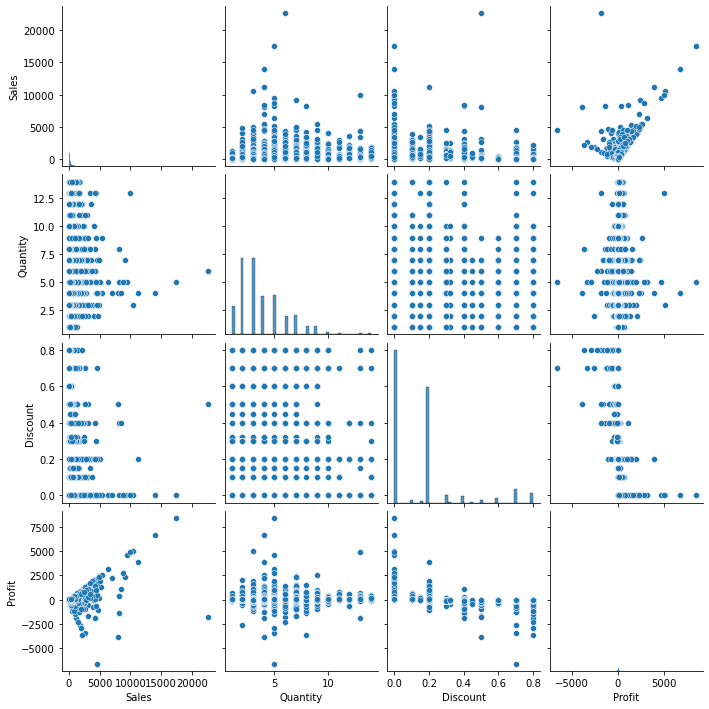

In [94]:
#Pairplot for all numerical columns
sns.pairplot(sales_df)

<AxesSubplot:xlabel='Sales', ylabel='Count'>

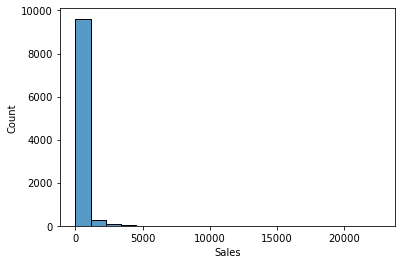

In [95]:
#Checking the range of sales
sns.histplot(sales_df['Sales'], bins=20)

Most of the sales of the products are below 5000.

<BarContainer object of 9994 artists>

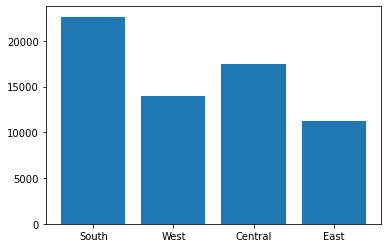

In [96]:
#Region-wise sales
plt.bar(sales_df['Region'], sales_df['Sales'])

In United States, there are more sales in the south region.

<BarContainer object of 9994 artists>

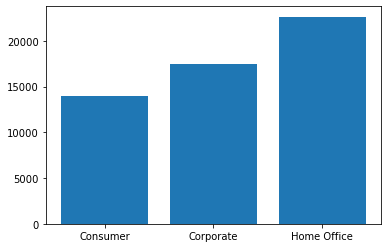

In [97]:
#Segment-wise sales
plt.bar(sales_df['Segment'], sales_df['Sales'])

Segment 'Home_office' has more sales as compared to other segments.

<BarContainer object of 9994 artists>

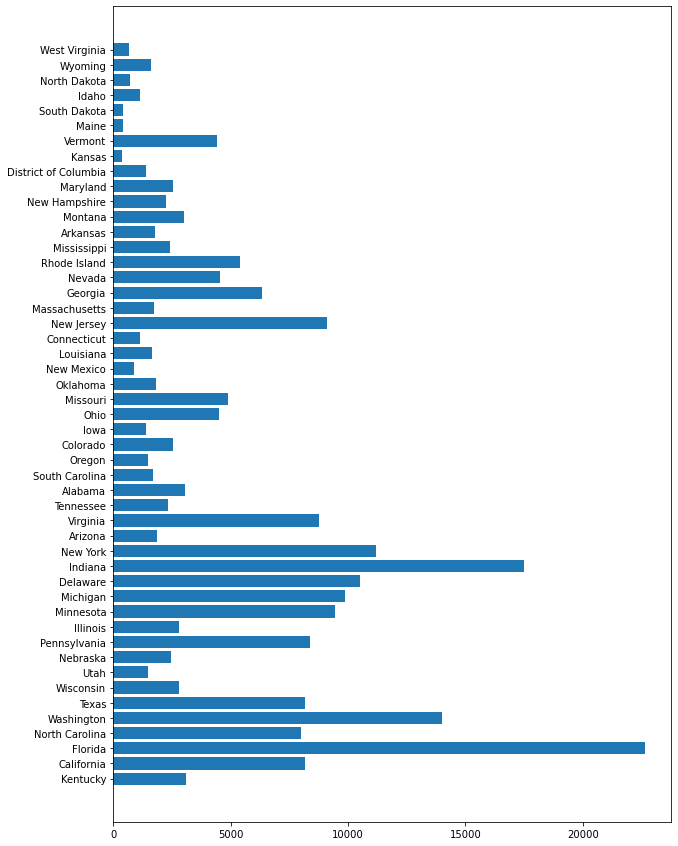

In [98]:
#state-wise sales
plt.figure(figsize=(10,15))
plt.barh(sales_df['State'], sales_df['Sales'])

In United States, California and indiana states has highest sales amoung the all cities

<BarContainer object of 9994 artists>

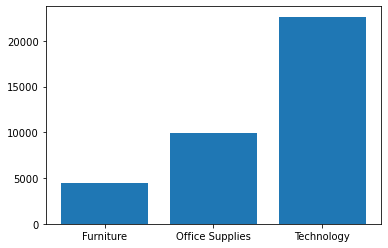

In [99]:
#Category-wise sales
plt.bar(sales_df['Category'], sales_df['Sales'])

Amoung all categories i.e.,'Furniture', 'office appliance', 'technology', 'Technology' category has highest sales.

<BarContainer object of 9994 artists>

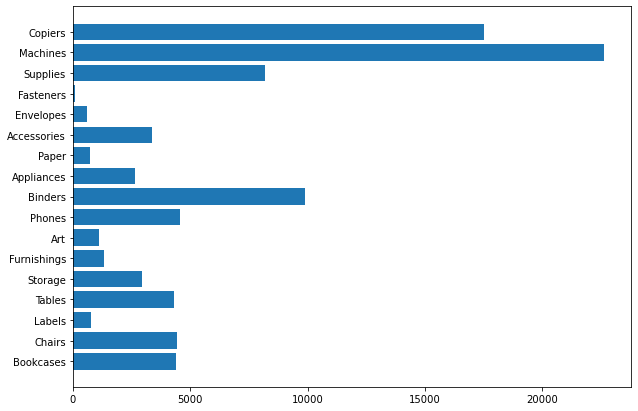

In [100]:
#subcategory-wise sales
plt.figure(figsize=(10,7))
plt.barh(sales_df['Sub-Category'], sales_df['Sales'])

Amoung all the sub-categories Copiers and Machines has highest sales.

<BarContainer object of 9994 artists>

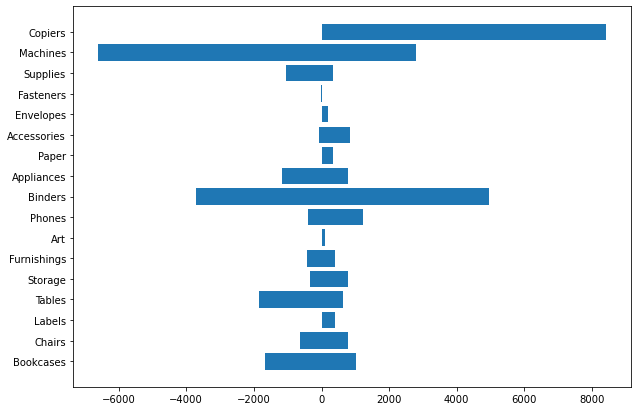

In [101]:
#subcategory-wise profit and loss
plt.figure(figsize=(10,7))
plt.barh(sales_df['Sub-Category'], sales_df['Profit'])

In the sub-category 'copiers' there is max profit. Whereas in machines there is max loss.

<BarContainer object of 9994 artists>

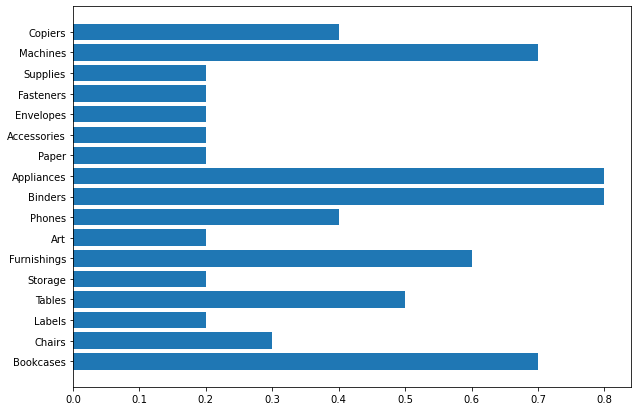

In [102]:
#subcategory-wise discount
plt.figure(figsize=(10,7))
plt.barh(sales_df['Sub-Category'], sales_df['Discount'])

There is more discount on sub-categories 'Appliances' and 'Binders'.

# Seasonal decompose

In [103]:
#components of time series
sales=week_sales['Sales']
decomp= seasonal_decompose(sales, period=4)

d_trend= decomp.trend
d_seasonal= decomp.seasonal
d_residual= decomp.resid

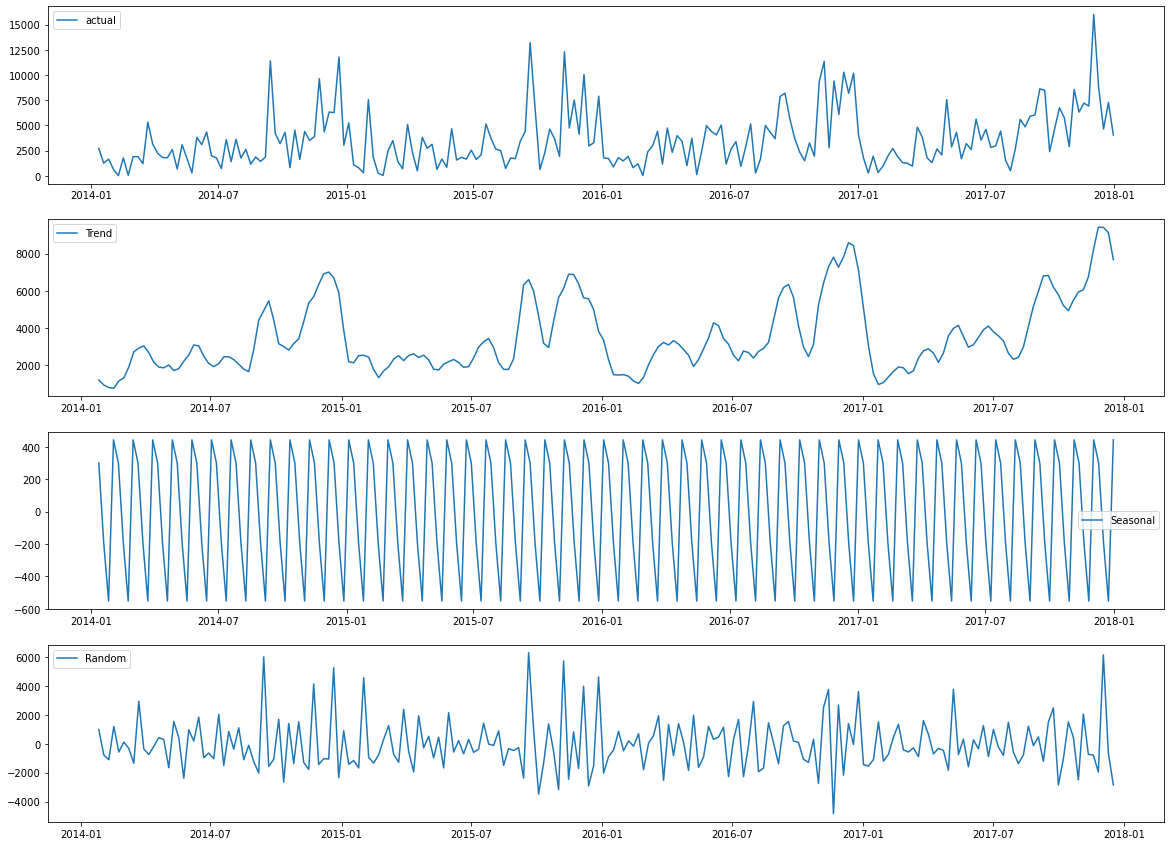

In [104]:
 # plot the components
fig,ax = plt.subplots(4,1,figsize=(20,15))

plt.subplot(411) # rows=4,col=1,pos=1
plt.plot(sales,label="actual")
plt.legend()

plt.subplot(412)
plt.plot(d_trend,label="Trend")
plt.legend()

plt.subplot(413)
plt.plot(d_seasonal,label="Seasonal")
plt.legend()

plt.subplot(414)
plt.plot(d_residual,label="Random")
plt.legend()

In this dataset, there is seasonality and trend in the data.

In [105]:
 #defining the function for checking the stationary
def checkStationarity(data):
    pvalue = adfuller(data)[1]
    if pvalue < 0.05:
        ret = print('pvalue= ',pvalue,"| Data is Stationary. Proceed to model building")
    else:
        ret = print('pvalue= ', pvalue,"| Data is not Stationary. Make is stationary")
        
    return(ret)

In [106]:
 #checking wheather data is stationary
checkStationarity(sales)

pvalue=  0.009539026607022182 | Data is Stationary. Proceed to model building


#### Since the pvalue is less than 0.05, data is stationary proceeding for model building.

#### As data is stationary i.e. d=0. Proceeding for ARMA model building.

# ARMA model

In [107]:
#Forecasting using ACF AND PACF
sales_acf= acf(sales) #by default nlags=40
sales_pacf= pacf(sales)

#### ACF- AutoCorrelation function

#### PACF- Partial Autocorrelation function

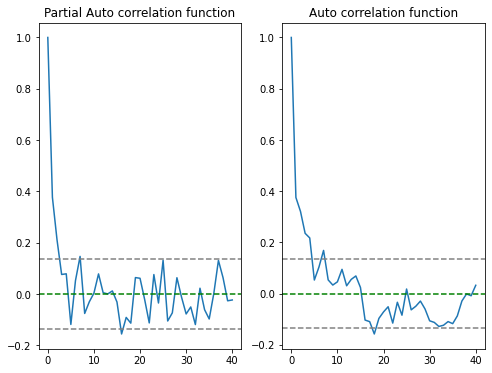

In [108]:
 #using ARMA model for predicting the mintemperature
#plot acf and pacf

fig, ax= plt.subplots(figsize=(8,6))
plt.subplot(122)
plt.plot(sales_acf)

plt.axhline(y=0, linestyle= '--', color='green')
#assuming the p=97.5% using z-score chart finding z-score
#y= +-1.96
plt.axhline(y=-1.96/np.sqrt(len(sales)), linestyle= '--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(sales)), linestyle= '--', color='gray')
plt.title('Auto correlation function')

plt.subplot(121)
plt.plot(sales_pacf)

plt.axhline(y=0, linestyle= '--', color='green')
#assuming the p=97.5% using z-score chart finding z-score
#x= +-1.96
plt.axhline(y=-1.96/np.sqrt(len(sales)), linestyle= '--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(sales)), linestyle= '--', color='gray')
plt.title('Partial Auto correlation function')
plt.show()

#### In ACF-plot, the graph is touching\crossing line 3-times. Hence, considering Q-values as 0,1,2.

#### In PACF-plot, the graph is crossing the line 3-times. Hence, considering P-values as 0,1.

In [109]:
#Considering P&Q values
P= np.arange(3)
print('P-values= ',P)
Q= np.arange(2)
print('q-values= ',Q)

P-values=  [0 1 2]
q-values=  [0 1]


In [110]:
# split the data into train and test
ratio = 0.7
rows = int(ratio * len(sales))

train = sales[:rows]
test = sales[rows:]

print("Total={}, Train={}, Test={}".format(len(sales), len(train), len(test)))

Total=208, Train=145, Test=63


#### Splitting the data into train and test at 70:30 ratio.

In [111]:
#Assuming initial values of p&q
p=0; q=1

In [112]:
#defining the ARMA model with initial values of p&q
m1= ARIMA(train, order=(p,0,q)).fit()

#### Considering initial values of p=1 and q=2 and building a ARMA model

In [113]:
#Summary of the ARMA model
m1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  Sales   No. Observations:                  145
Model:                     ARMA(0, 1)   Log Likelihood               -1336.312
Method:                       css-mle   S.D. of innovations           2433.026
Date:                Tue, 09 Aug 2022   AIC                           2678.624
Time:                        11:21:14   BIC                           2687.554
Sample:                    01-12-2014   HQIC                          2682.253
                         - 10-16-2016                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const        3108.2110    238.445     13.035      0.000    2640.867    3575.555
ma.L1.Sales     0.1814      0.070      2.576      0.010       0.043       0.319
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1           -5.5137           +0.0000j            5.5137            0.5000
-----------------------------------------------------------------------------
"""

In [114]:
#Finding AIC & BIC scores
aic1, bic1= np.round(m1.aic,2), np.round(m1.bic,2)
print('model_1 \nAIC=',aic1, '| BIC=',bic1)

model_1 
AIC= 2678.62 | BIC= 2687.55


#### aic= akike information criteria

#### bic= bayesian information criteria

In [115]:
#check the model fit using Ljung box test
pvalue= sm.stats.acorr_ljungbox(m1.resid, lags=[1], return_df=True)['lb_pvalue'].values

if pvalue < 0.05:
    print('Not a good model')
else:
    print('Good model')

Good model


In [116]:
#Forecasting on test data
f1= m1.predict(start=0, end= len(test)-1)

In [117]:
#Appending actual and predicted to empty list and creating DataFrame
actual=[]; pred=[]
for i in range(len(f1)):
    actual.append(test[i])
    pred.append(f1[i])
    
#compare actual test and predicted test
df= pd.DataFrame({'actual':actual, 'forecast':pred})
df['error']= df.actual-df.forecast
df

,actual,forecast,error
0,3256.6640,3108.211023,148.452977
1,1937.1920,3038.715361,-1101.523361
2,9356.0708,2784.223841,6571.846959
3,11346.3860,2903.588874,8442.797126
4,2779.9760,2694.710737,85.265263
...,...,...,...
58,16008.1720,2660.860344,13347.311656
59,8794.4040,2632.067597,6162.336403
60,4639.8190,3076.629162,1563.189838
61,7274.0430,3183.363671,4090.679329


#### Finding the error values by differencing the actual and forecasted values.

In [118]:
#Finding the errors
mse1= mean_squared_error(df.actual, df.forecast)
rmse1= np.sqrt(mse1)
print('ARMA model')
print('MSE=',mse1,'\nRMSE1=',rmse1)

ARMA model
MSE= 12822763.091455234 
RMSE1= 3580.8885896457646


Text(0.5, 1.0, 'ARMA model 1')

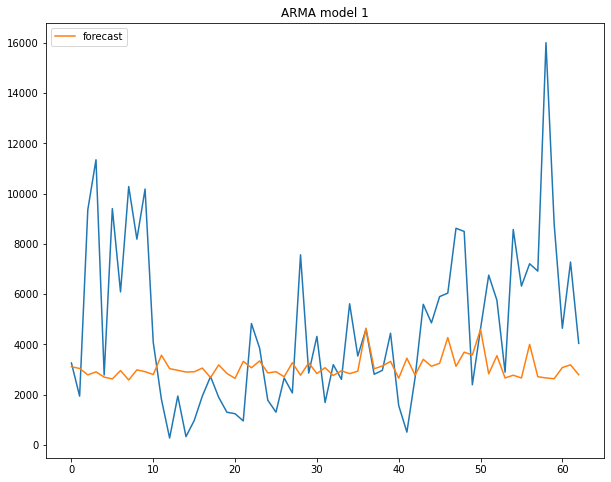

In [119]:
#plot actual and forecast data
df.actual.plot(figsize=(10,8))
df.forecast.plot(legend=True)
plt.title('ARMA model 1')

#### When p=0 & q=1 the error is high. Also from the graph, there is huge variation between actual and forecasted values.

In [120]:
#Defining the function for checking different combinations of p,q values

def check_errors(p,q):
    #training the model
    m= ARIMA(train, order=(p,0,q)).fit()

    aic, bic= np.round(m.aic,2), np.round(m.bic,2)
    print('p=',p, '\nq=',q)
    print('------------------------')
    print('AIC= ', aic, '\nBIC= ', bic)

    #predict on test data
    f= m.predict(start=0, end= len(test)-1)

    actual=[]; pred=[]
    for i in range(len(f)):
        actual.append(test[i])
        pred.append(f[i])
    
    #compare actual test and predicted test
    df2= pd.DataFrame({'actual':actual, 'forecast':pred})
    df2['error']= df2.actual-df2.forecast

    mse= mean_squared_error(df2.actual, df2.forecast)
    #print('ARMA model')
    print('-----------------------')
    print('\nMSE= ',mse,'\nRMSE= ', np.sqrt(mse))

    #plot actual and forecast data
    df2.actual.plot(figsize=(14,8))
    df2.forecast.plot(legend=True)
    plt.title('ARMA model')
    plt.show()

#### Function takes input as p and q and Print the AIC, BIC scores and MSE, RMSE scores. Also the plot of actual and forecasted sales.

p= 0 
q= 0
------------------------
AIC=  2683.0 
BIC=  2688.96
-----------------------

MSE=  12307842.571565125 
RMSE=  3508.2534930596344


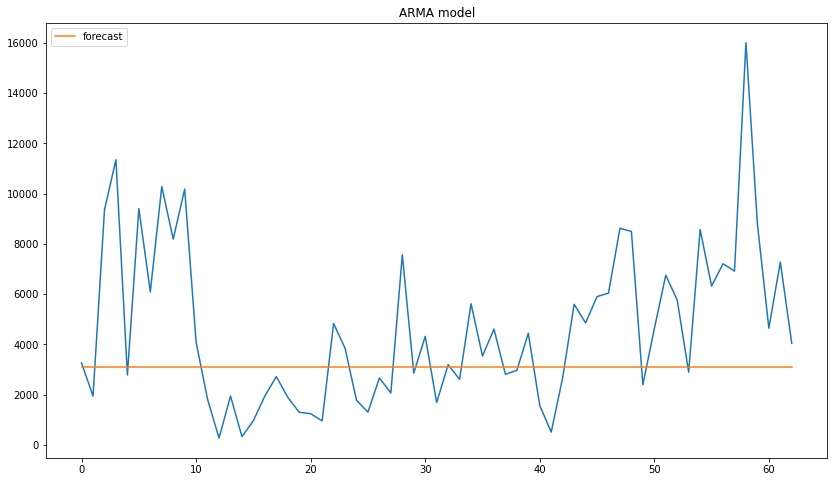

In [121]:
#considering p=0, q=2
check_errors(0,0)

p= 1 
q= 0
------------------------
AIC=  2676.43 
BIC=  2685.36
-----------------------

MSE=  13137899.810302312 
RMSE=  3624.624092275268


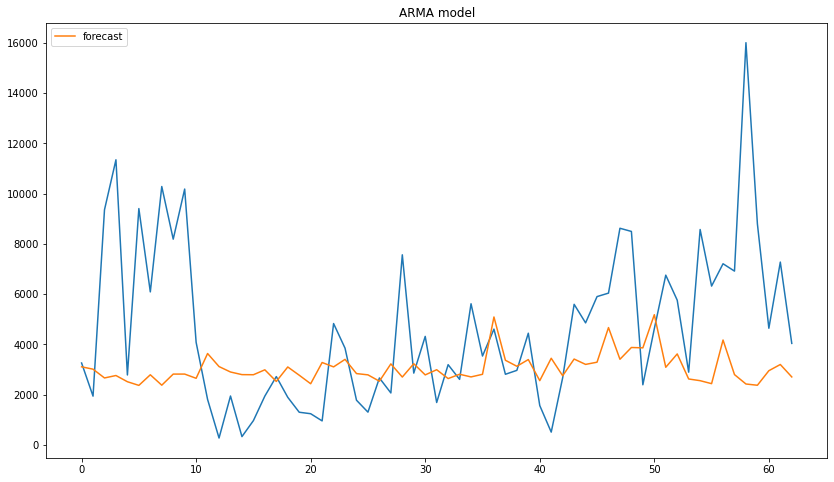

In [122]:
#considering p=1, q=0
check_errors(1,0)

p= 1 
q= 1
------------------------
AIC=  2674.33 
BIC=  2686.24
-----------------------

MSE=  13389899.024429865 
RMSE=  3659.221095319312


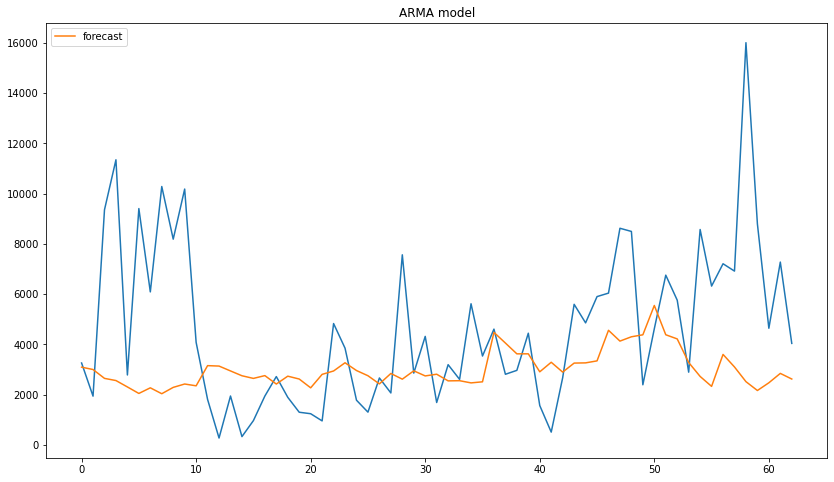

In [123]:
#considering p=1, q=1
check_errors(1,1)

p= 2 
q= 0
------------------------
AIC=  2674.66 
BIC=  2686.57
-----------------------

MSE=  13374035.376505086 
RMSE=  3657.0528265948096


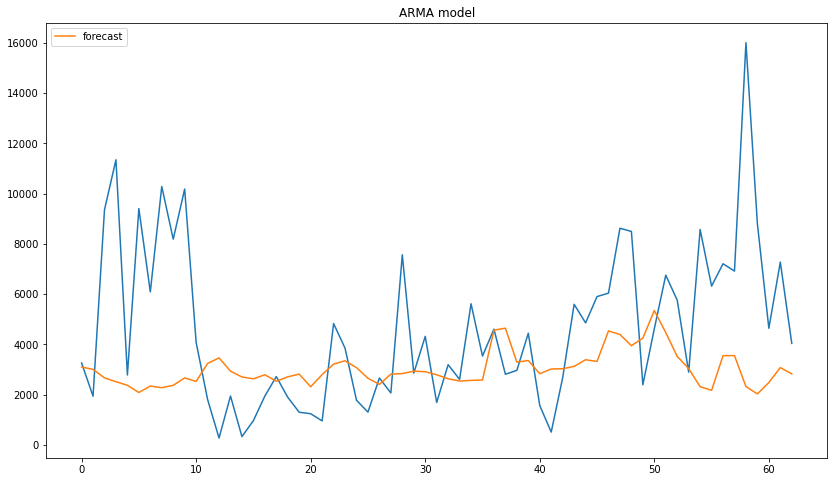

In [124]:
#considering p=2, q=0
check_errors(2,0)

p= 2 
q= 1
------------------------
AIC=  2676.08 
BIC=  2690.96
-----------------------

MSE=  13399208.330031037 
RMSE=  3660.492908070037


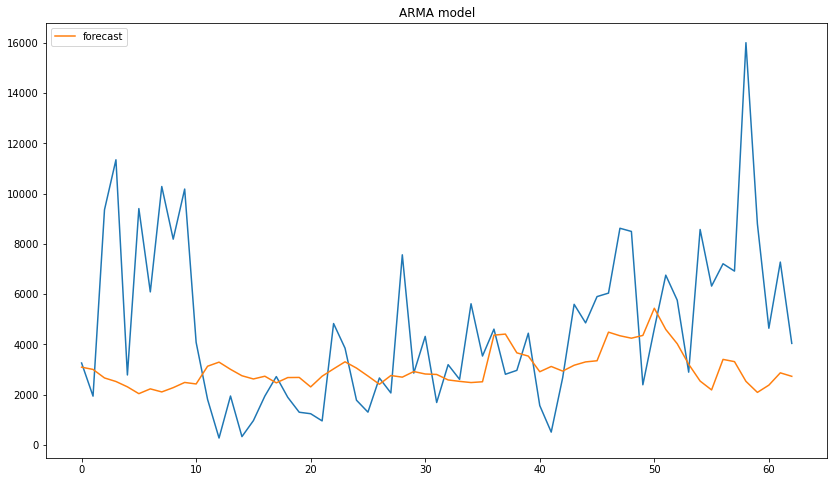

In [125]:
#considering p=2, q=1
check_errors(2,1)

#### After comparing all the possible combinations of P & Q values in ARMA model, the errors high in all the models. There is huge variation in actual sales and forecasted sales.

In [126]:
#creating dataframe for all the values
a= [[0,0,0],[0,0,1],[1,0,0],[1,0,1], [2,0,0],[2,0,1]]
mse1=[]
rmse1=[]
aic1=[]
bic1=[]

for i in a:
    #print(i)
    m= ARIMA(train, order=(i)).fit()
    aic, bic= np.round(m.aic,2), np.round(m.bic,2)
    
    aic1.append(aic)
    bic1.append(bic)
    
    f= m.predict(start=0, end= len(test)-1)
    
    actual=[]; pred=[]
    for i in range(len(f)):
        actual.append(test[i])
        pred.append(f[i])
    
    #compare actual test and predicted test
    df= pd.DataFrame({'actual':actual, 'forecast':pred})
    df['error']= df.actual-df.forecast

    mse= mean_squared_error(df.actual, df.forecast)
    
    mse1.append(mse)
    rmse1.append(np.sqrt(mse))
pd.DataFrame({'P,D,Q':a,'aic':aic1,'bic':bic1,'mse':mse1,'rmse':rmse1})

,"P,D,Q",aic,bic,mse,rmse
0,"[0, 0, 0]",2683.00,2688.96,1.230784e+07,3508.253493
1,"[0, 0, 1]",2678.62,2687.55,1.282276e+07,3580.888590
2,"[1, 0, 0]",2676.43,2685.36,1.313790e+07,3624.624092
3,"[1, 0, 1]",2674.33,2686.24,1.338990e+07,3659.221095
4,"[2, 0, 0]",2674.66,2686.57,1.337404e+07,3657.052827
5,"[2, 0, 1]",2676.08,2690.96,1.339921e+07,3660.492908


#### Building other models for getting better forecasted values.

# SARIMA model

In [127]:
#Building SARIMA model with initial values of p and q
p=0; d=0;q=1

#### Considering the initial values as p=0 & q=1.

In [128]:
# Defining the SARIMA model
sm1 = SARIMAX(train,order=(p,d,q),seasonal_order=(p,d,q,30)).fit()

In [129]:
#summary of model
sm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              Sales   No. Observations:                  145
Model:             SARIMAX(0, 0, 1)x(0, 0, 1, 30)   Log Likelihood               -1376.980
Date:                            Tue, 09 Aug 2022   AIC                           2759.959
Time:                                    11:21:18   BIC                           2768.889
Sample:                                01-12-2014   HQIC                          2763.588
                                     - 10-16-2016                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.4004      0.093      4.302      0.000       0.218       0.583
ma.S.L30       0.2632      0.118      2.230      0.026       0.032       0.495
sigma2      1.021e+07   7.66e+05     13.324      0.000    8.71e+06    1.17e+07
===================================================================================
Ljung-Box (L1) (Q):                   7.15   Jarque-Bera (JB):               147.80
Prob(Q):                              0.01   Prob(JB):                         0.00
Heteroskedasticity (H):               1.17   Skew:                             1.63
Prob(H) (two-sided):                  0.59   Kurtosis:                         6.73
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [130]:
# forecast
f1 = sm1.forecast(len(test))
f1

2016-10-23     355.643408
2016-10-30    1025.789839
2016-11-06     305.500268
2016-11-13     116.991113
2016-11-20     466.899105
                 ...     
2017-12-03       0.000000
2017-12-10       0.000000
2017-12-17       0.000000
2017-12-24       0.000000
2017-12-31       0.000000
Freq: W-SUN, Name: predicted_mean, Length: 63, dtype: float64

#### These are the forecasted values for SARIMA model

In [131]:
pd.DataFrame({'Actual':test, 'forecasted':f1, 'errors':test-f1})

,Actual,forecasted,errors
2016-10-23,3256.6640,355.643408,2901.020592
2016-10-30,1937.1920,1025.789839,911.402161
2016-11-06,9356.0708,305.500268,9050.570532
2016-11-13,11346.3860,116.991113,11229.394887
2016-11-20,2779.9760,466.899105,2313.076895
...,...,...,...
2017-12-03,16008.1720,0.000000,16008.172000
2017-12-10,8794.4040,0.000000,8794.404000
2017-12-17,4639.8190,0.000000,4639.819000
2017-12-24,7274.0430,0.000000,7274.043000


#### Comparing the actual sales and predicted sales of SARIMA model. Also finding the errors by differencing the actual and forecasted values.

In [132]:
# MSE and RMSE
mse2 = mean_squared_error(test, f1)
print('SARIMA model')
print("p={} | q={} \nMSE = {} \nRMSE = {}".format(p,q,mse2, np.sqrt(mse2)))

SARIMA model
p=0 | q=1 
MSE = 29789603.828473095 
RMSE = 5457.985326883272


#### The errors are very high for the SARIMA model.

Text(0.5, 1.0, 'SARIMA Model. Forecast Comparison of sales')

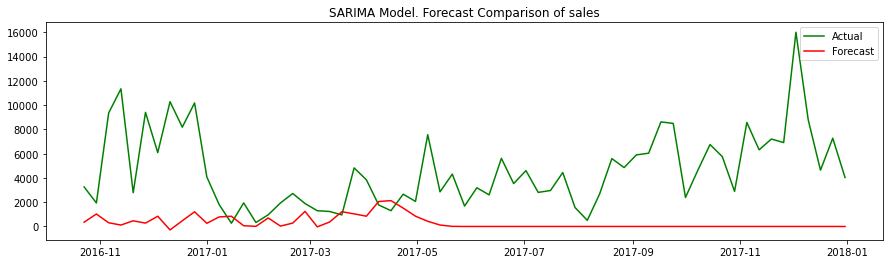

In [133]:
# plot the actual and forecast data (SARIMA)
plt.figure(figsize=(15,4))
plt.plot(test,'g',label='Actual')
plt.plot(f1,'r',label='Forecast')
plt.legend()
plt.title("SARIMA Model. Forecast Comparison of sales")

#### From the graph, we can see there is huge difference or variation in the actual sales and forecasted sales.

#### Tuning the values of p and q for better model.

In [134]:
def sarima(p,d,q):
    # Defining the SARIMA model
    sm1 = SARIMAX(train,order=(p,d,q),seasonal_order=(p,d,q,30)).fit()
    
    #forecasting using SARIMA model
    f1 = sm1.forecast(len(test))
    
    # MSE and RMSE
    mse2 = mean_squared_error(test, f1)
    print("p={} | q={} \nMSE = {} \nRMSE = {}".format(p,q,mse2, np.sqrt(mse2)))
    
    # plot the actual and forecast data (SARIMA)
    plt.figure(figsize=(15,4))
    plt.plot(test,'g',label='Actual')
    plt.plot(f1,'r',label='Forecast')
    plt.legend()
    plt.title("SARIMA Model. Forecast Comparison of sales")
    plt.show()

p=0 | q=0 
MSE = 31391325.533294678 
RMSE = 5602.796224502073


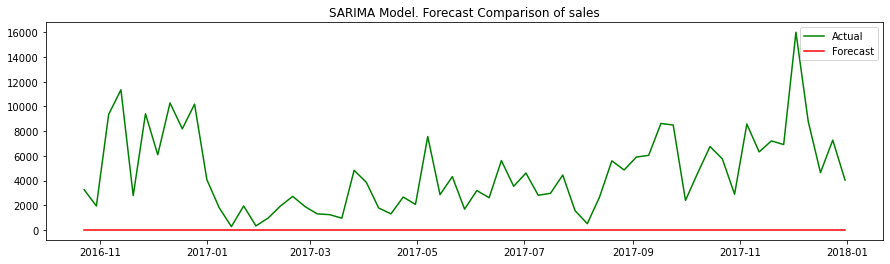

In [135]:
#considering p=0, q=0
sarima(0,0,0)

p=1 | q=0 
MSE = 30041709.54784329 
RMSE = 5481.031795916102


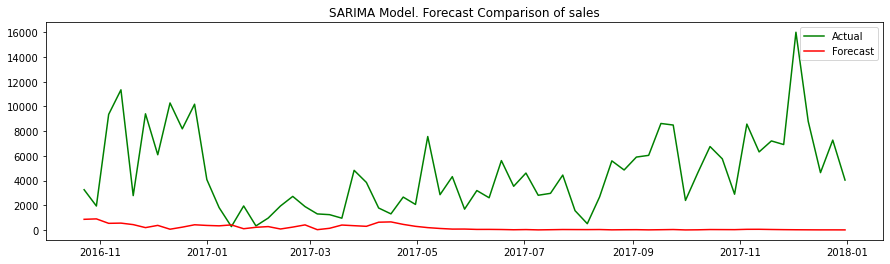

In [136]:
#considering p=1, q=0
sarima(1,0,0)

p=1 | q=1 
MSE = 15693468.749445884 
RMSE = 3961.498296029658


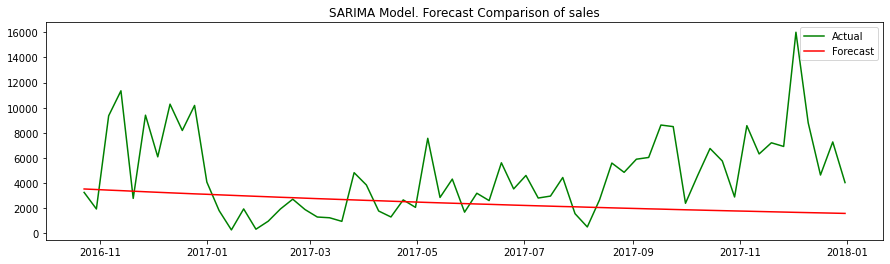

In [137]:
#considering p=1, q=1
sarima(1,0,1)

p=1 | q=2 
MSE = 12518822.329935879 
RMSE = 3538.1947840580906


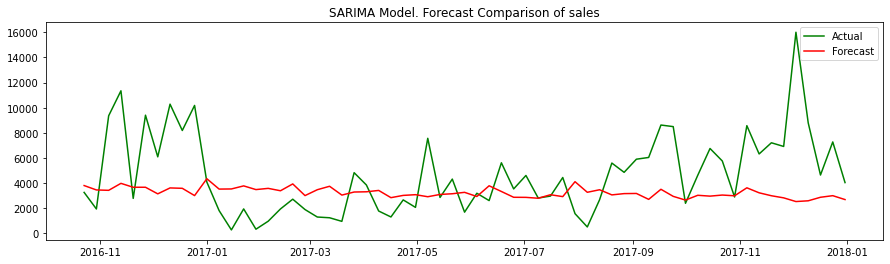

In [138]:
#considering p=2, q=0
sarima(1,0,2)

p=2 | q=1 
MSE = 12695577.004473798 
RMSE = 3563.085320964655


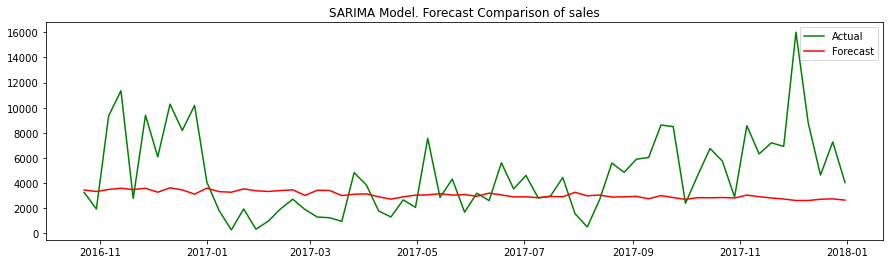

In [139]:
#considering p=2, q=1
sarima(2,0,1)

#### After considering all the possible combinations of assuming p & q vales, there is huge variation in the actual and forecasted sales.

In [140]:
#creating dataframe for all the values
a= [[0,0,0],[0,0,1],[0,0,2],[1,0,0], [1,0,1],[1,0,2]]
mse2=[]
rmse2=[]

for i in a:
    #print(i)
    sm1 = SARIMAX(train,order=(i)).fit()
    f1 = sm1.forecast(len(test))
    mse = mean_squared_error(test, f1)
    
    mse2.append(mse)
    rmse2.append(np.sqrt(mse))
pd.DataFrame({'P,D,Q':a,'mse':mse2,'rmse':rmse2})

,"P,D,Q",mse,rmse
0,"[0, 0, 0]",3.139133e+07,5602.796225
1,"[0, 0, 1]",3.135326e+07,5599.397886
2,"[0, 0, 2]",3.133204e+07,5597.503033
3,"[1, 0, 0]",3.083045e+07,5552.517447
4,"[1, 0, 1]",1.542846e+07,3927.907803
5,"[1, 0, 2]",1.403997e+07,3746.994841


#### comparing the MSE and RMSE for all possible combinations of assuming p and q values

#### Considering the SARIMAX model for getting better forecasted values.

# SARIMAX model

#### In this model, we have to consider other parameters for predicting the sales.

In [141]:
#splitting the data into train and test and considering all parameters
rows = int(0.8 * len(week_sales)); rows

train1 = week_sales.iloc[:rows]
test1 = week_sales.iloc[rows:]

print('size of dataframes')
print('actual={} | train={} | test={}'.format(len(week_sales), len(train1), len(test1)))

size of dataframes
actual=208 | train=166 | test=42


In [142]:
#considering other parameters in train and test data
train_other= train1[['Quantity', 'Discount', 'Profit']]
test_other= test1[['Quantity', 'Discount', 'Profit']]

#### Considering parameters such as, 'Quantity', 'Discount', 'Profit' for predicting the sales.

In [143]:
#considering initial values of p and q
p=0; d=0; q=1

#### considering the initial values as p=0, d=0, q=1 for SARIMAX model building.

In [144]:
# build the SARIMAX model using the additional features
m2 = SARIMAX(train1.Sales, order=(p,d,q),seasonal_order=(p,d,q,30), exog=train_other.values).fit()

In [145]:
#summary
m2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              Sales   No. Observations:                  166
Model:             SARIMAX(0, 0, 1)x(0, 0, 1, 30)   Log Likelihood               -1434.568
Date:                            Tue, 09 Aug 2022   AIC                           2881.135
Time:                                    11:21:34   BIC                           2899.807
Sample:                                01-12-2014   HQIC                          2888.714
                                     - 03-12-2017                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            83.8483      7.821     10.721      0.000      68.520      99.177
x2           248.0418    168.041      1.476      0.140     -81.312     577.396
x3             0.5628      0.142      3.969      0.000       0.285       0.841
ma.L1         -0.1113      0.080     -1.385      0.166      -0.269       0.046
ma.S.L30      -0.0023      0.132     -0.017      0.986      -0.261       0.256
sigma2      1.911e+06   1.52e+05     12.560      0.000    1.61e+06    2.21e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               641.82
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               1.28   Skew:                             2.03
Prob(H) (two-sided):                  0.36   Kurtosis:                        11.73
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [146]:
#Forecasting the sales using SARIMAX model
f2 = m2.forecast(len(test1), exog=test_other.values,)
f2.head()

2017-03-19    1671.561439
2017-03-26    4012.577367
2017-04-02    5157.592174
2017-04-09    2148.027100
2017-04-16    3320.089846
Freq: W-SUN, Name: predicted_mean, dtype: float64

#### These are the forecasted values for SARIMAX model

In [147]:
pd.DataFrame({'actual': test1.Sales, 'forecasted':f2, 'errors':test1.Sales-f2}).head(10)

,actual,forecasted,errors
2017-03-19,951.6460,1671.561439,-719.915439
2017-03-26,4827.3080,4012.577367,814.730633
2017-04-02,3846.4728,5157.592174,-1311.119374
2017-04-09,1775.1585,2148.027100,-372.868600
2017-04-16,1300.0530,3320.089846,-2020.036846
2017-04-23,2660.3620,5670.632905,-3010.270905
2017-04-30,2064.5086,3801.454866,-1736.946266
2017-05-07,7563.8318,3946.868103,3616.963697
2017-05-14,2854.3050,3935.198352,-1080.893352
2017-05-21,4315.4260,5178.400644,-862.974644


#### These are the actual sales and forecasted sales by the SARIMAX model. also finding the errors by differencing the actual and forecasted sales.

In [148]:
# Calcualate the MSE and RMSE
mse2 = mean_squared_error(test1.Sales, f2)
print("p={},q={} \nMSE = {} \nRMSE = {}".format(p,q,mse2, np.sqrt(mse2))  )

p=0,q=1 
MSE = 2035285.0321055998 
RMSE = 1426.6341619720172


#### These are MSE and RMSE values for the SARIMAX model.

Text(0.5, 1.0, 'SARIMAX model. Forecast Comparison of sales')

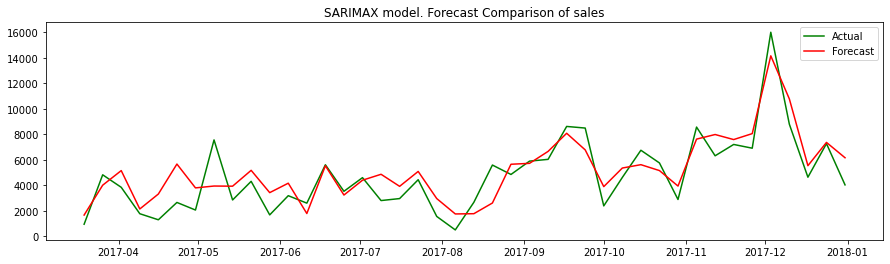

In [149]:
# plot the actual and forecast data (SARIMAX)
plt.figure(figsize=(15,4))
plt.plot(test1.Sales,'g',label='Actual')
plt.plot(f2,'r',label='Forecast')
plt.legend()
plt.title("SARIMAX model. Forecast Comparison of sales")

In [150]:
def sarimax(p,d,q):
    # build the SARIMAX model using the additional features
    m2 = SARIMAX(train1.Sales, order=(p,d,q),seasonal_order=(p,d,q,30), exog=train_other.values).fit()
    
    # forecast the SARIMAX model on the exog_test data
    f2 = m2.forecast(len(test1), exog=test_other.values)
    
    # Calcualate the MSE and RMSE
    mse2 = mean_squared_error(test1.Sales, f2)
    print("p={},q={} \nMSE = {} \nRMSE = {}".format(p,q,mse2, np.sqrt(mse2))  )
    
    # plot the actual and forecast data (SARIMAX)
    plt.figure(figsize=(15,4))
    plt.plot(test1.Sales,'g',label='Actual')
    plt.plot(f2,'r',label='Forecast')
    plt.legend()
    plt.title("SARIMAX model. Forecast Comparison of sales")

p=0,q=0 
MSE = 2055854.036587574 
RMSE = 1433.824967207495


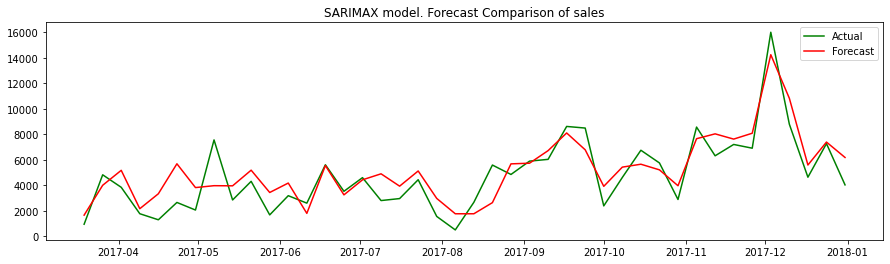

In [151]:
#considering p=0, q=0
sarimax(0,0,0)

p=1,q=0 
MSE = 2039322.2227641265 
RMSE = 1428.0483965062692


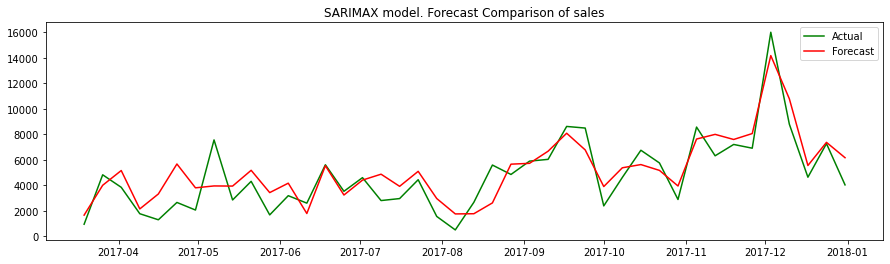

In [152]:
#considering p=1, q=0
sarimax(1,0,0)

p=1,q=0 
MSE = 2039322.2227641265 
RMSE = 1428.0483965062692


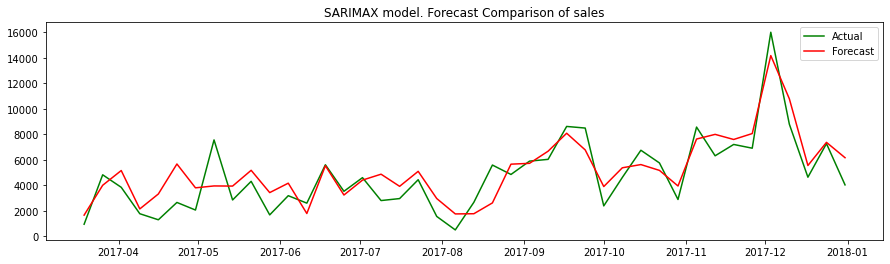

In [153]:
#considering p=1, q=1
sarimax(1,0,0)

p=1,q=1 
MSE = 2012847.5848100851 
RMSE = 1418.7485981702625


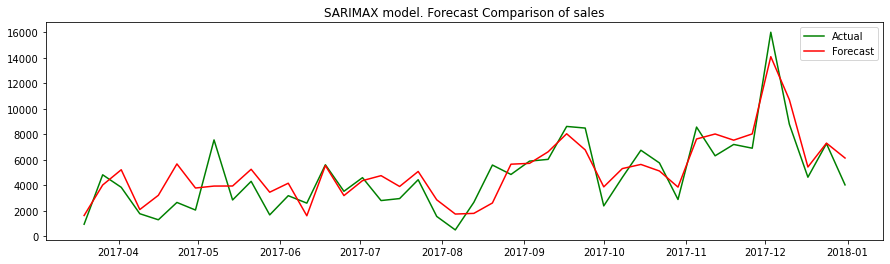

In [154]:
#considering p=1, q=1
sarimax(1,0,1)

p=2,q=0 
MSE = 1992088.874894524 
RMSE = 1411.4137858525132


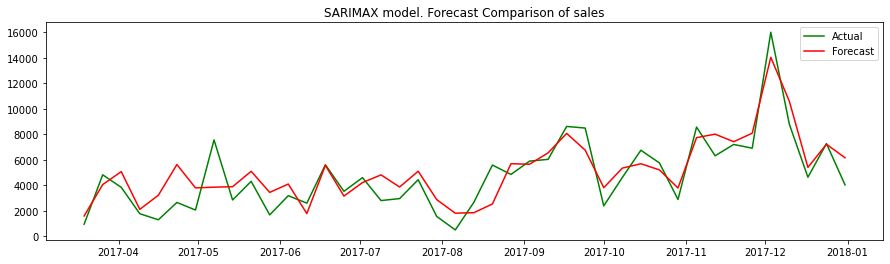

In [155]:
#considering p=2, q=0
sarimax(2,0,0)

p=2,q=1 
MSE = 1991980.7649845534 
RMSE = 1411.3754868866588


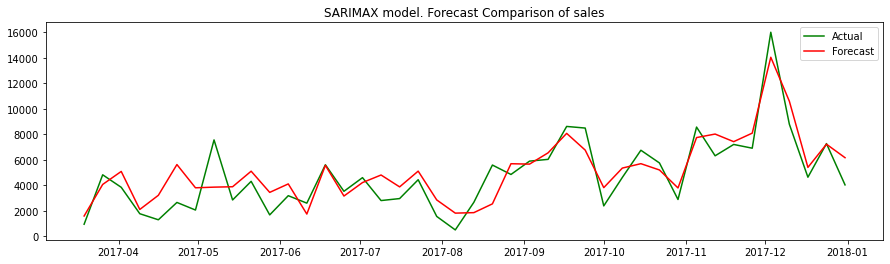

In [156]:
#considering p=2, q=1
sarimax(2,0,1)

#### In SARIMAX model, when we assume p=2, q=1. There is less error and also forecasted sales are following the trend with actual sales.

In [157]:
#Building the model with p=2, q=1

p=2; d=0; q=1
m2 = SARIMAX(train1.Sales, order=(p,d,q),seasonal_order=(p,d,q,30), exog=train_other.values).fit()

#Forecasting the sales using SARIMAX model
f2 = m2.forecast(len(test1), exog=test_other.values)

new_df= pd.DataFrame({'actual':test1.Sales, 'forecast':f2, 'errors':test1.Sales-f2})
new_df.head(10)

,actual,forecast,errors
2017-03-19,951.6460,1597.487947,-645.841947
2017-03-26,4827.3080,4071.235270,756.072730
2017-04-02,3846.4728,5092.172397,-1245.699597
2017-04-09,1775.1585,2109.750078,-334.591578
2017-04-16,1300.0530,3220.320199,-1920.267199
2017-04-23,2660.3620,5631.358185,-2970.996185
2017-04-30,2064.5086,3808.847022,-1744.338422
2017-05-07,7563.8318,3860.052718,3703.779082
2017-05-14,2854.3050,3890.462446,-1036.157446
2017-05-21,4315.4260,5110.397444,-794.971444


#### These are the actual and forecasted sales by SARIMAX model when assuming p=2 & q=1.

#### These are the forecasted values by assuming other parameters such as 'Quantity', 'Discount', 'Profit'

### After comparing all the models i.e., ARMA, SARIMA and SARIMAX, SARIMAX model performs the best as compared to other models. As per the visualization of graphs, forecasted sales by SARIMAX model are following the trend of actual sales.

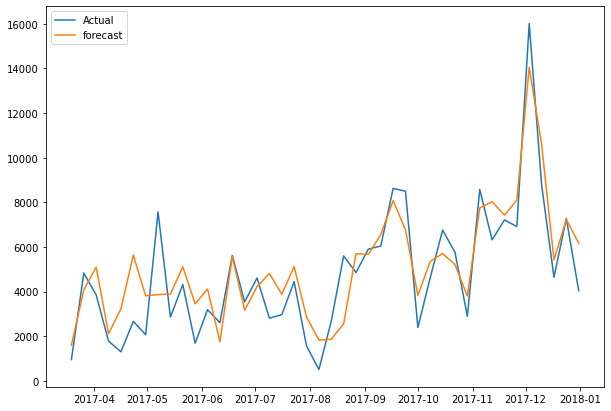

In [158]:
plt.figure(figsize=(10,7))
plt.plot(new_df['actual'], label='Actual')
plt.plot(new_df['forecast'], label='forecast')
plt.legend()

### This is the visualizations of actual Furniture sales and forecasted Furniture sales. As per the graph we can see, the forecasted Furniture sales folloeing the trend of actual Furniture sales.

# Predicting the future sales

In [192]:
#creating future date as index
from pandas.tseries.offsets import DateOffset
future_date= [week_sales.index[-1]+DateOffset(weeks=x) for x in range(0,52)]

future_dataset= pd.DataFrame(index=future_date[1:], columns=week_sales.columns)
future_dataset

,Sales,Quantity,Discount,Profit
2018-01-07,NaN,NaN,NaN,NaN
2018-01-14,NaN,NaN,NaN,NaN
2018-01-21,NaN,NaN,NaN,NaN
2018-01-28,NaN,NaN,NaN,NaN
2018-02-04,NaN,NaN,NaN,NaN
2018-02-11,NaN,NaN,NaN,NaN
2018-02-18,NaN,NaN,NaN,NaN
2018-02-25,NaN,NaN,NaN,NaN
2018-03-04,NaN,NaN,NaN,NaN
2018-03-11,NaN,NaN,NaN,NaN


In [189]:
#concating original data with future sales
future_df= pd.concat([week_sales, future_dataset])
future_df

,Sales,Quantity,Discount,Profit
2014-01-12,2712.428,15,0.60,717.0750
2014-01-19,1250.473,24,1.55,-254.0044
2014-01-26,1655.958,26,0.20,355.6263
2014-02-02,623.666,5,0.35,-13.2304
2014-02-09,14.560,2,0.00,5.5328
...,...,...,...,...
2018-11-25,NaN,NaN,NaN,NaN
2018-12-02,NaN,NaN,NaN,NaN
2018-12-09,NaN,NaN,NaN,NaN
2018-12-16,NaN,NaN,NaN,NaN


In [183]:
model= SARIMAX(week_sales['Sales'], order=(1,0,1), seasonal_order=(1,0,1,12))
results= model.fit()

In [199]:
future_df['forecast']= results.predict(start=180, end=259)
future_df

,Sales,Quantity,Discount,Profit,forecast
2014-01-12,2712.428,15,0.60,717.0750,NaN
2014-01-19,1250.473,24,1.55,-254.0044,NaN
2014-01-26,1655.958,26,0.20,355.6263,NaN
2014-02-02,623.666,5,0.35,-13.2304,NaN
2014-02-09,14.560,2,0.00,5.5328,NaN
...,...,...,...,...,...
2018-11-25,NaN,NaN,NaN,NaN,2907.576292
2018-12-02,NaN,NaN,NaN,NaN,3078.653294
2018-12-09,NaN,NaN,NaN,NaN,3239.191646
2018-12-16,NaN,NaN,NaN,NaN,2974.096120


<AxesSubplot:>

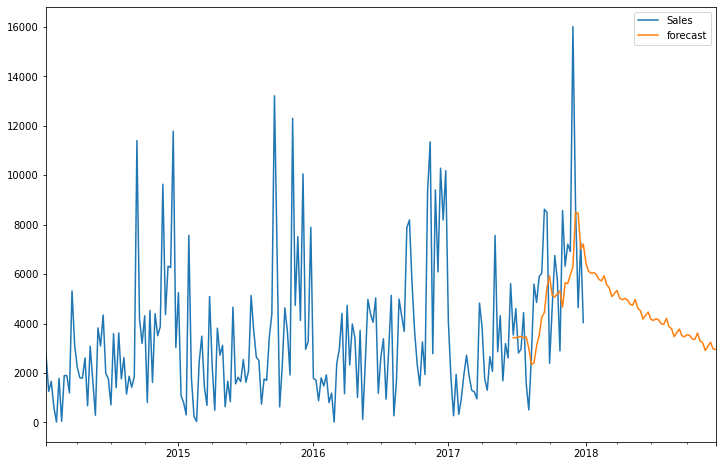

In [200]:
future_df[['Sales','forecast']].plot(figsize=(12,8))

## From the future forecast, we can see there is decrease in the trend of sales.